# This is the numerical problem 2 with its tutorial notebook. The deadline for a solution of problem 2 is the midnight of October 18

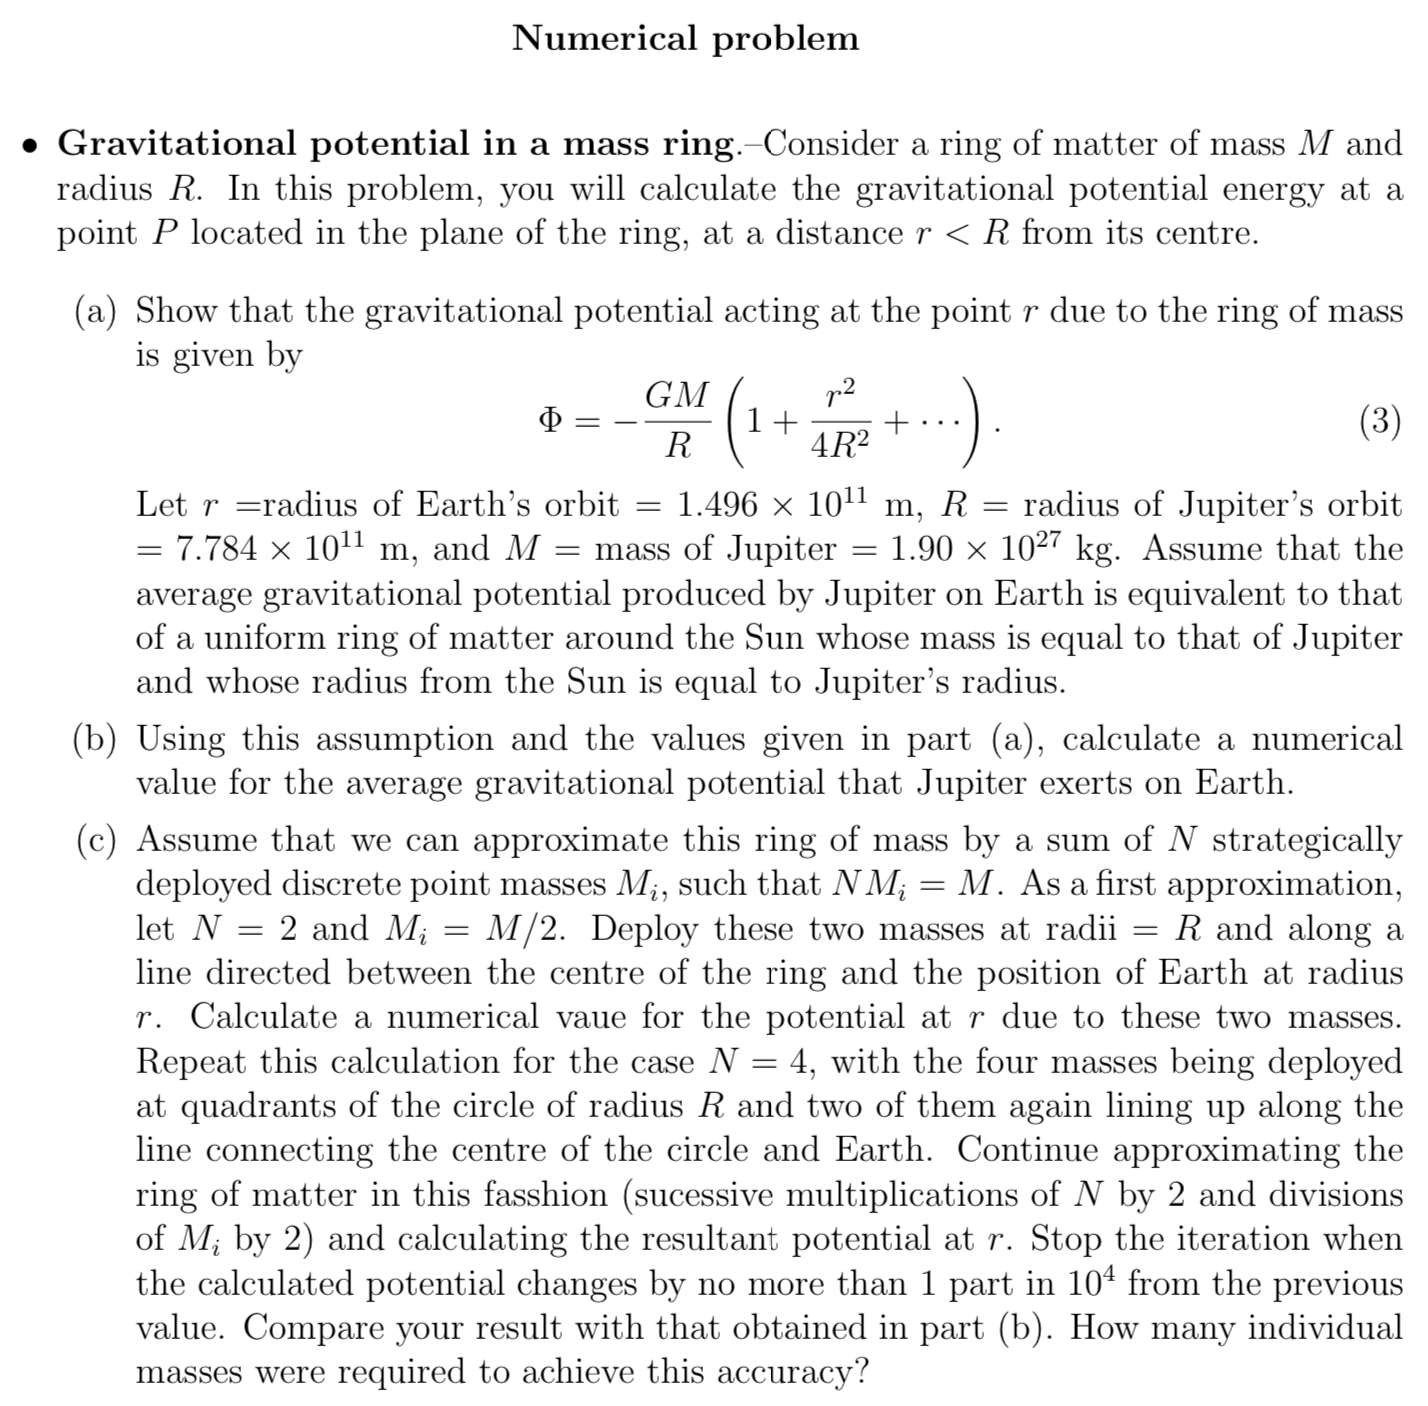

In [1]:
from IPython.display import Image
Image('./NA_images/NA5_1.png', width=700, height=600)

## Hint for Part __(c)__

The gravitational potential at Earth's position from an even number $N$ of points, each having the mass $M_i = M/N$,
evenly distributed along the circle of the radius $R$, with two points lying on the line connecting
the center and the Earth on its orbit of the radius $r<R$, is equal to

$$
\varphi (x) = -\frac{GM_i}{R}\sum_{i=1}^{N}\frac{1}{\sqrt{1+x^2-2x\cos\alpha_i}} =
-\frac{GM_i}{R}\left[\frac{1}{(1-x)}+\frac{1}{(1+x)}+\sum_{i=1}^{N/2-1}\frac{2}{\sqrt{1+x^2-2x\cos\alpha_i}}\right],
$$

where $x = r/R$ and $\alpha_i = i\frac{2\pi}{N}$.

Before using this equation, check if it is true or not!

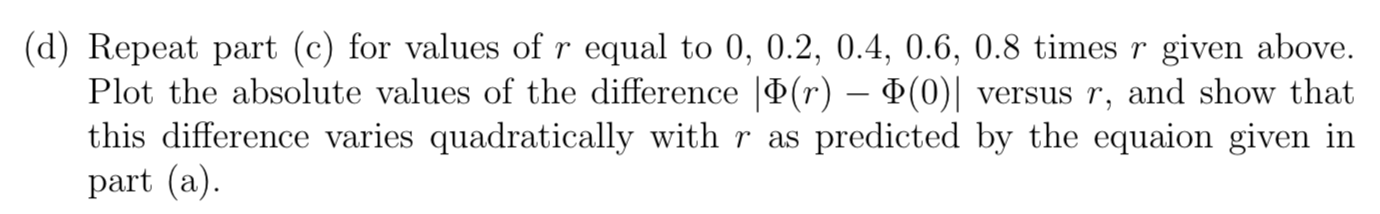

In [2]:
Image('./NA_images/NA5_2.png', width=700, height=600)

# The tutorial notebook for the numerical problem 2

# Compute the gravitational potential of a ring of a radius $R$ at a point in its plane at a radius $r>R$

In this tutorial, I use functions from Python's sympy module that enable symbolic computations.
We're going to calculate the gravitational potential of Jupiter at Saturn's orbit, approximating Jupiter's gravity to be that of a ring at the orbit of Jupiter.

The gravitational potential for this problem is

$$
\varphi = -2x\mu G\int_0^\pi\frac{d\theta}{\sqrt{1+x^2-2x\cos\theta}},
$$

where $\mu = M/(2\pi R)$ and $x=R/r < 1$.

In [1]:
%matplotlib inline

# populate the interactive namespace with functions 
# from the module sympy

# to avoid a confusion with matplotlib functions
# that may have same names as sympy functions
# don't import numpy and matplotlib functions on this step

from sympy import *

# this command makes pretty looking formula printing
init_printing(pretty_print=True)

In [3]:
# define symbols that are going to be used
# in symbolic computations for real, integer, 
# and function objects
x, r, R, theta, mu, G, M, g = symbols('x r R theta mu G M g')
n = symbols('n', integer=True)
f, genfun, phi = symbols('f genfun phi', cls=Function)

In [ ]:
# define the integrand that here represents
# the so-called generating function of
# the Legendre polynomials
genfun = 1/sqrt(1+x**2-2*x*cos(theta))
genfun

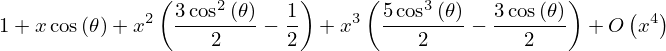

In [6]:
# expand it into a series in x=(R/r) < 1 up to its 3rd power
genfun.series(x,0,4)

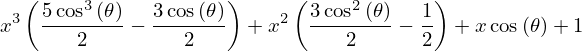

In [7]:
# get rid of the O symbol for the following computations
getfunc_trunc = (genfun.series(x,0,4)).removeO()
getfunc_trunc

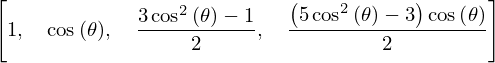

In [8]:
# collect all the coefficients in the above expansion
coeff = [getfunc_trunc.coeff(x,i).factor() for i in range(4)]
coeff

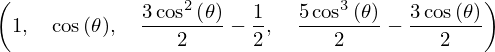

In [9]:
# verify that these coefficients are in fact the Legendre polynomials
legendre(0,cos(theta)), legendre(1,cos(theta)),\
legendre(2,cos(theta)), legendre(3,cos(theta))

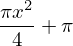

In [10]:
# integrate the truncated series expansion of
# the generating function in theta from 0 to pi
integral = integrate(getfunc_trunc, (theta,0,pi))
integral

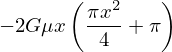

In [11]:
# substitute the integral in the expression for 
# the gravitatonal potential
phi = -2*x*mu*G*integral
phi

The gravitational potential of the ring is


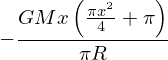

In [12]:
# substitute mu expressed via M, R, and r in phi
f = phi.subs({mu:M/(2*pi*R)})
print ("The gravitational potential of the ring is")
f

In [18]:
RJ = 7.784e11  # radius of Jupiter's orbit in m
MJ = 1.90e27   # Jupiter's mass in kg
GN = 6.674e-11 # Newton's gravitational constant in SI units
RS = 1.434e12  # radius of Saturn's orbit in m

fJS = (f.subs({G:GN, M:MJ, R:RJ, x:(RJ/RS)})) # substituting the above values in the expression for f we found above
print ("The gravitational potential of Jupiter's ring",\
       "at Saturn's orbit is",fJS,"SI units")

The gravitational potential of Jupiter's ring at Saturn's orbit is -94942.0268274155 SI units


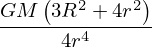

In [14]:
# to find the gravitational acceleration along r
# differentiate the last expression with respect to r  (recall that g is the gradient of the potential)
# after substituting x=R/r into it
g = ((f.subs({x:(R/r)}).diff(r))).simplify()
g

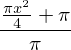

In [15]:
# compute a dimensionless gravitational potential by
# dividing f by the point-mass potential -GM/r  
ff = f.subs({R:(r*x)})/(-G*M/r)
ff

In [19]:
# now it's time to populate the interactive namespace 
# with functions from the modules numpy and matplotlib

# IGNORE warnings saying that there may be confusion of
# matplotlib and sympy functions

import numpy as np

# the following commands allow to produce a nice pdf 
# version of the notebook with figures:
from matplotlib.pyplot import *
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

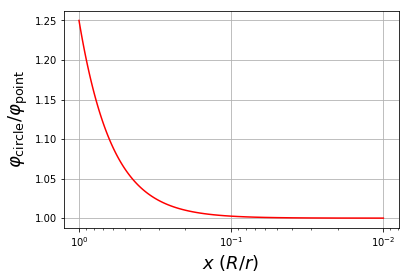

In [20]:
# plot the dimensionless potential ff
nn = 100
xn = np.linspace(1e-2,1.,nn)  # From the edge of the ring to a 100 times the radius.
yn = np.linspace(0,0,nn)
for i in range(nn):
    yn[i] = ff.subs({x:xn[i]})

semilogx(xn,yn,'r')
fsize=18
xlabel("$x\ (R/r)$",fontsize=fsize)
ylabel("$\\varphi_\mathrm{circle}/\\varphi_\mathrm{point}$",\
       fontsize=fsize)
gca().invert_xaxis()
grid()

Notice how at at very far distances the ring gravitaiton approximates to that of a point mass as expected. 